# 数据挖掘互评作业二: 频繁模式与关联规则挖掘
数据集：[Microsoft 资讯推荐](https://learn.microsoft.com/zh-cn/azure/open-datasets/dataset-microsoft-news?tabs=azureml-opendatasets)和[SNAP中的Social circles: Facebook](https://snap.stanford.edu/data/ego-Facebook.html)

仓库：https://github.com/ygjldd/DM2024_HW2

数据保存在data文件夹下

# Microsoft 资讯推荐数据集

## 数据获取
下载https://mind201910small.blob.core.windows.net/release/MINDsmall_train.zip并解压至data文件夹下

## 数据预处理

In [1]:
data_path = "data/MINDsmall_train/"

根据数据集介绍为数据文件标注列名，并查看数据集内容

In [2]:
import pandas as pd
import os

behaviors_path = os.path.join(data_path, "behaviors.tsv")
news_path = os.path.join(data_path, "news.tsv")

behaviors_df = pd.read_csv(
    behaviors_path,
    sep="\t",
    header=None,
    names=["Impression ID", "User ID", "Time", "History", "Impressions"],
)
news_df = pd.read_csv(
    news_path,
    sep="\t",
    header=None,
    names=[
        "News ID",
        "Category",
        "SubCategory",
        "Title",
        "Abstract",
        "URL",
        "Title Entities",
        "Abstract Entities",
    ],
)

display(behaviors_df.head())
display(news_df.head())

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


### 缺失值处理：若存在缺失值则对该数据进行丢弃处理

In [3]:
import pandas as pd

missing_behaviors = behaviors_df.isnull().sum().sum()
missing_news = news_df.isnull().sum().sum()

print("behaviors_df中的缺失数据数量：", missing_behaviors)
print("news_df中的缺失数据数量：", missing_news)

if behaviors_df.isnull().values.any():
    behaviors_df.dropna(inplace=True)
    
if news_df.isnull().values.any():
    news_df.dropna(inplace=True)

behaviors_df中的缺失数据数量： 3238
news_df中的缺失数据数量： 2673


### 转换格式

In [4]:
behaviors_df["Time"] = pd.to_datetime(behaviors_df["Time"])
display(behaviors_df.head())

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,2019-11-11 09:05:58,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,2019-11-12 18:11:30,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,2019-11-14 07:01:48,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,2019-11-11 05:28:05,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,2019-11-12 16:11:21,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


## 频繁模式挖掘
### 模式命名
使用FP-Growth算法挖掘behaviors.tsv中的history列，命名为用户浏览资讯模式

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

transactions = behaviors_df["History"].str.split()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_transactions, min_support=0.01, use_colnames=True)

展示频繁模式挖掘结果：

In [6]:
display(frequent_itemsets.sort_values(by="support", ascending=False))

,support,itemsets
47,0.132273,(N306)
69,0.114124,(N42620)
0,0.098974,(N31801)
1,0.097712,(N45794)
35,0.093263,(N43142)
...,...,...
454,0.010031,(N60050)
527,0.010024,(N31213)
116,0.010024,(N1398)
606,0.010005,"(N871, N61388)"


对其中的多项集进行展示：

In [7]:
display(frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x)) > 1].sort_values(by="support", ascending=False))

,support,itemsets
588,0.027809,"(N31801, N306)"
624,0.027445,"(N871, N306)"
620,0.026677,"(N43142, N306)"
670,0.025962,"(N42620, N306)"
590,0.023438,"(N306, N45794)"
...,...,...
778,0.010109,"(N1150, N59704)"
602,0.010083,"(N4607, N37509)"
713,0.010057,"(N42620, N619)"
734,0.010044,"(N4607, N10059)"


由结果可知：用户浏览的不同新闻资讯间存在一定的关联性，例如浏览了新闻资讯N306的用户也很有可能浏览N31801

对其中的关联规则进行挖掘和分析：

In [8]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

display(rules.sort_values(by='confidence', ascending=False))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
285,(N61864),(N47020),0.032850,0.044273,0.016939,0.515644,11.646832,0.015485,1.973189,0.945190
286,(N47020),(N61864),0.044273,0.032850,0.016939,0.382604,11.646832,0.015485,1.566497,0.956487
252,(N36530),(N42620),0.037365,0.114124,0.014077,0.376741,3.301143,0.009813,1.421360,0.724132
190,(N4020),(N871),0.050473,0.087174,0.018793,0.372342,4.271247,0.014393,1.454336,0.806587
468,(N60491),(N43142),0.027809,0.093263,0.010193,0.366550,3.930291,0.007600,1.431426,0.766892
...,...,...,...,...,...,...,...,...,...,...
45,(N45794),(N32852),0.097712,0.034386,0.010161,0.103988,3.024163,0.006801,1.077680,0.741814
406,(N31801),(N55743),0.098974,0.062442,0.010200,0.103056,1.650434,0.004020,1.045281,0.437389
241,(N42620),(N5978),0.114124,0.053712,0.011683,0.102371,1.905924,0.005553,1.054208,0.536554
157,(N306),(N28088),0.132273,0.054584,0.013465,0.101800,1.865022,0.006245,1.052568,0.534515


由结果可知：(N61864) $\rightarrow$ (N47020)、(N47020) $\rightarrow$ (N61864)、(N36530) $\rightarrow$ (N42620)等规则的置信度较高，即浏览(N61864)的用户也很有可能浏览(N47020)等。

# 可视化分析
对若干支持度高的多项集和置信度较高的关联规则进行可视化：

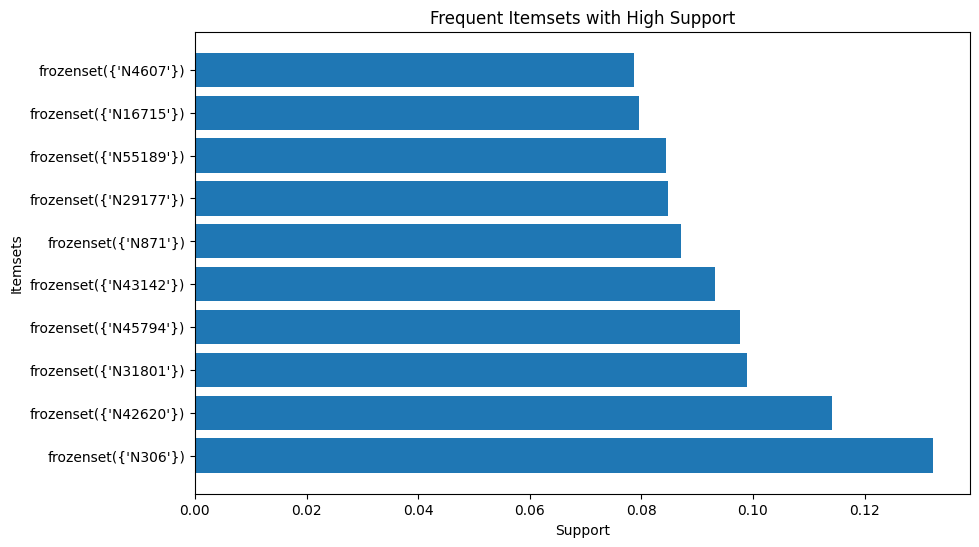

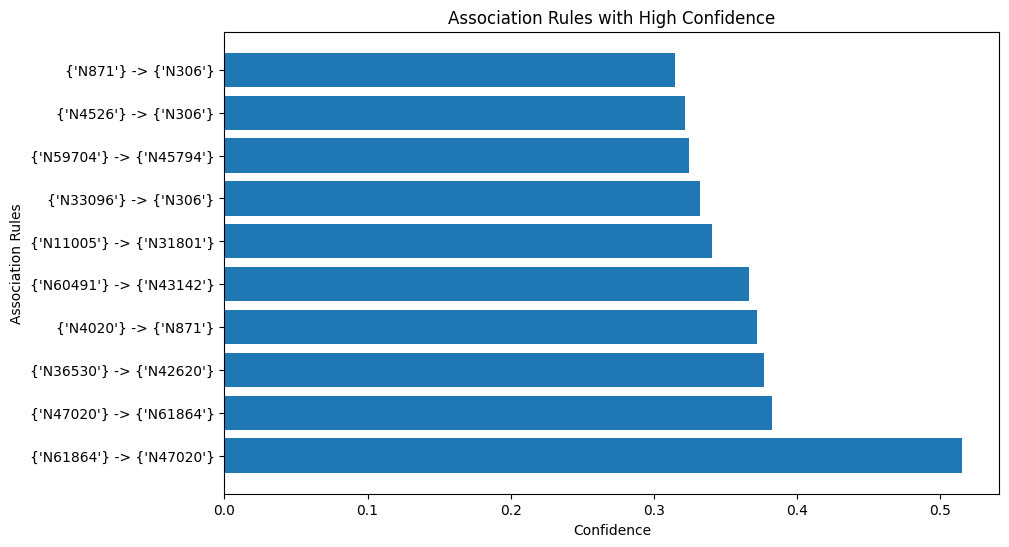

In [13]:
import matplotlib.pyplot as plt

top_10_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_itemsets)), top_10_itemsets['support'], align='center')
plt.yticks(range(len(top_10_itemsets)), top_10_itemsets['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets with High Support')
plt.show()

top_10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_rules)), top_10_rules['confidence'], align='center')
plt.yticks(range(len(top_10_rules)), [f"{set(rule['antecedents'])} -> {set(rule['consequents'])}" for _, rule in top_10_rules.iterrows()])
plt.xlabel('Confidence')
plt.ylabel('Association Rules')
plt.title('Association Rules with High Confidence')
plt.show()


发现可视化结果与之前的频繁模式挖掘结果相符，即用户浏览的不同新闻资讯间存在一定的关联性

# Social circles: Facebook数据集

## 数据获取
下载https://snap.stanford.edu/data/facebook_combined.txt.gz并解压至data文件夹下

## 数据预处理

In [1]:
import pandas as pd

df = pd.read_csv("data/facebook_combined.txt", sep=" ", header=None, names=["ID1", "ID2"])

### 缺失值处理：若存在缺失值则对该数据进行丢弃处理

In [2]:
import pandas as pd

missing_data = df.isnull().sum().sum()

print("数据集中的缺失数据数量：", missing_data)

if df.isnull().values.any():
    df.dropna(inplace=True)

数据集中的缺失数据数量： 0


## 频繁模式挖掘
### 模式命名
使用FP-Growth算法挖掘频繁模式，命名为Facebook社交模式

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

transactions = df.groupby("ID1")["ID2"].apply(list).values

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_transactions, min_support=0.03, use_colnames=True)

展示频繁模式挖掘结果：

In [4]:
display(frequent_itemsets.sort_values(by="support", ascending=False))

,support,itemsets
0,0.068523,(1888)
37,0.067158,(2543)
1,0.058968,(1800)
55,0.053781,(2611)
108,0.051324,"(1888, 1800)"
...,...,...
35545,0.030030,"(2624, 2560, 2611, 2551)"
30091,0.030030,"(2560, 2507, 2464, 2655)"
30092,0.030030,"(2464, 2604, 2590, 2655)"
30093,0.030030,"(2464, 2507, 2590, 2655)"


对其中的多项集进行展示：

In [5]:
display(frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x)) > 1].sort_values(by="support", ascending=False))

,support,itemsets
108,0.051324,"(1888, 1800)"
118,0.048321,"(1888, 1833)"
135,0.046137,"(1888, 1804)"
2119,0.046137,"(2601, 2604)"
1989,0.045591,"(2611, 2604)"
...,...,...
35528,0.030030,"(2593, 2586, 2590, 2551)"
35539,0.030030,"(2560, 2586, 2624, 2551)"
35608,0.030030,"(2464, 2409)"
35609,0.030030,"(2560, 2409)"


由结果可知：用户的社交关系存在一定的关联性，例如访问用户1888的用户很有可能会访问用户1800

对其中的关联规则进行挖掘和分析：

In [6]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

display(rules.sort_values(by='confidence', ascending=False))


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
754883,"(2600, 2601, 2586, 2590, 2655)",(2604),0.031122,0.049686,0.031122,1.000000,20.126374,0.029576,inf,0.980840
1522693,"(2560, 2625, 2507, 2607, 2586, 2492)",(2604),0.030030,0.049686,0.030030,1.000000,20.126374,0.028538,inf,0.979735
582087,"(2624, 2593, 2625, 2560, 2600, 2586)",(2604),0.030303,0.049686,0.030303,1.000000,20.126374,0.028797,inf,0.980011
1377391,"(2625, 2593, 2607, 2578, 2586)",(2604),0.031941,0.049686,0.031941,1.000000,20.126374,0.030354,inf,0.981669
833088,"(2625, 2593, 2601, 2604, 2638, 2611, 2586)",(2590),0.030030,0.048321,0.030030,1.000000,20.694915,0.028579,inf,0.981143
...,...,...,...,...,...,...,...,...,...,...
33,(1888),"(1730, 1827)",0.068523,0.034671,0.030030,0.438247,12.640148,0.027654,1.718422,0.988631
598,(1888),(1813),0.068523,0.037947,0.030030,0.438247,11.548912,0.027430,1.712591,0.980606
673,(1888),"(1816, 1800)",0.068523,0.031122,0.030030,0.438247,14.081568,0.027897,1.724740,0.997325
398,(1888),"(1833, 1746, 1804)",0.068523,0.030030,0.030030,0.438247,14.593625,0.027972,1.726684,1.000000


由结果可知：(2600, 2601, 2586, 2590, 2655) $\rightarrow$ (2604)、(2560, 2625, 2507, 2607, 2586, 2492) $\rightarrow$ (2604)等规则的置信度较高，即同时访问了(2600, 2601, 2586, 2590, 2655)的用户也很有可能访问(2604)、同时访问了(2560, 2625, 2507, 2607, 2586, 2492)的用户也很有可能访问(2604)等。

# 可视化分析
对若干支持度高的多项集和置信度较高的关联规则进行可视化：

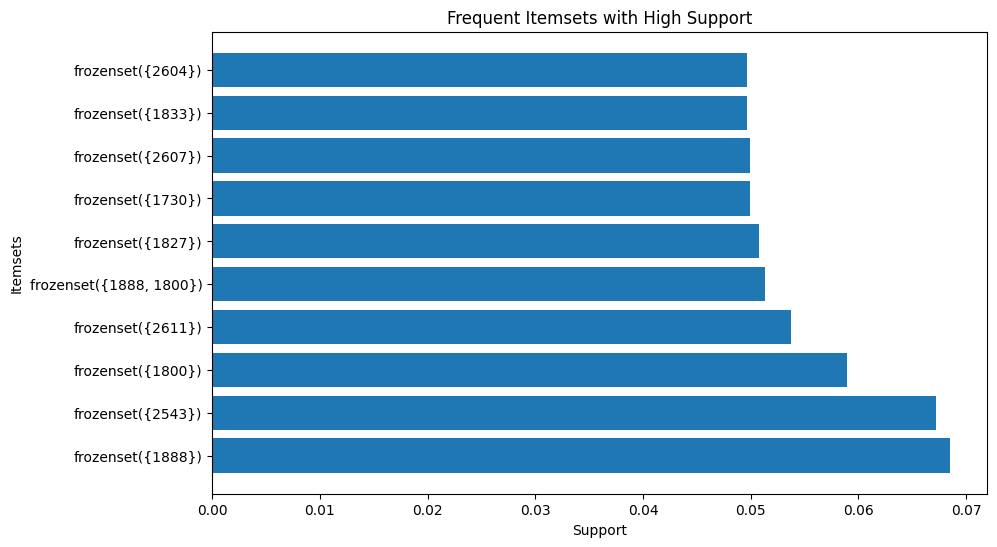

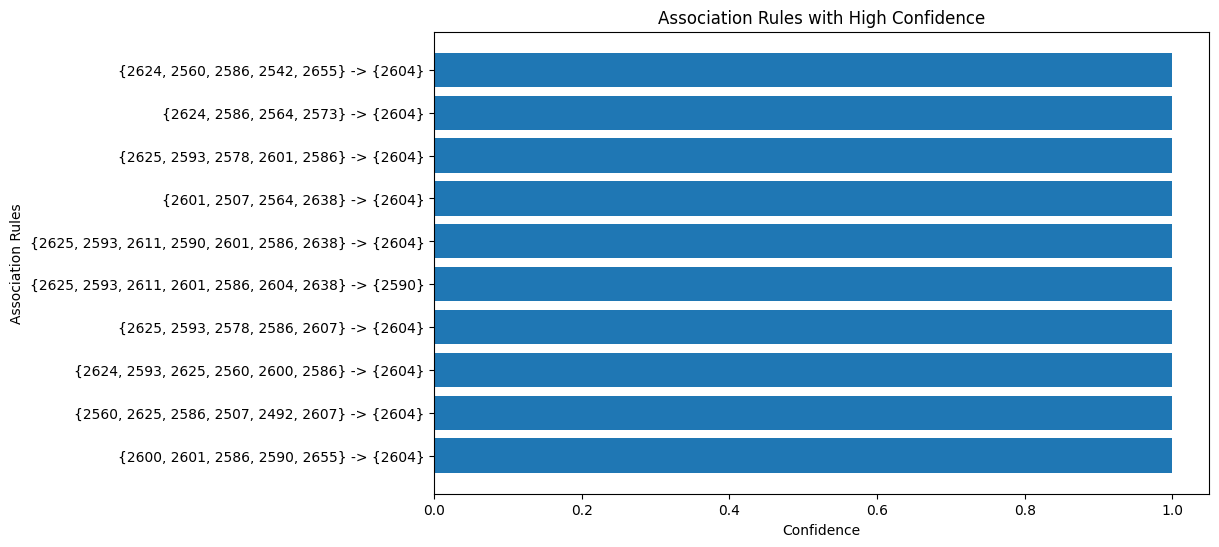

In [7]:
import matplotlib.pyplot as plt

top_10_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_itemsets)), top_10_itemsets['support'], align='center')
plt.yticks(range(len(top_10_itemsets)), top_10_itemsets['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets with High Support')
plt.show()

top_10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_rules)), top_10_rules['confidence'], align='center')
plt.yticks(range(len(top_10_rules)), [f"{set(rule['antecedents'])} -> {set(rule['consequents'])}" for _, rule in top_10_rules.iterrows()])
plt.xlabel('Confidence')
plt.ylabel('Association Rules')
plt.title('Association Rules with High Confidence')
plt.show()


发现可视化结果与之前的频繁模式挖掘结果相符，即用户的社交关系存在一定的关联性